# WeatherPy

---


In [2]:
# So we're given quite a bit of the code already for a good chunk of this file. I simple note what I have changed/added.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Code that imports the weather_api_key from the api_keys file.
from api_keys import weather_api_key

# Ran into an error breifly here but remembered I had to download citipy. After I did that, the code.
from citipy import citipy

### Generating the Cities List by Using the `citipy` Library

In [3]:
# (SF) List for holding the latitude and longitude combinations.
lat_lngs = []

# (SF) Empty list for holding the cities names.
cities = []

# (SF) Ranges for latitude and longitude.
lat_range = (-90, 90)
lng_range = (-180, 180)

# (SF) Set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# (SF) Code meant for identifying nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # (SF) if function meant to find if the city is unique, which then adds it to the list.
    if city not in cities:
        cities.append(city)

# (SF) Printing the city count to confirm sufficient count.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Creating Plots to Showcase the Relationship Between Weather Variables and Latitude.

### Used the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code.

In [4]:
# Added/set the API url.
url = "http://api.openweathermap.org/data/2.5/weather"

# Defined empty list that will fetch the weather data for each city.
city_data = []

# Print for the logger.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Counters.
record_count = 1
set_count = 1

# (SF) Loop that goes through all the cities in the list to fetch weather data.
for i, city in enumerate(cities):
        
    # Using the "if" function that groups cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Added the endpoint url for each city.
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Print to log the url, record, and set numbers.
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count.
    record_count += 1

    # Using the "try" function that runs an API request for each of the cities.
    try:
        # Parses the JSON and retrieves the data
        city_weather = requests.get(city_url).json()

        # Parses out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Appending the City information into city_data list.
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # A code similar to "On Error Resume Next" that, when it runs into an error, it skips to the next city.
    except:
        print("City not found. Skipping...")
        pass
              
# Print that indicates that the Data Loading is complete. 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | natal
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | ghadamis
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | le port
Processing Record 7 of Set 1 | margate
Processing Record 8 of Set 1 | severnoye
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | bratsk
Processing Record 13 of Set 1 | opuwo
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | jayapura
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | kingston
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | benguela
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | enewetak

In [5]:
# Added the pd.DataFrame..." code to turn the cit_data into a dataframe.
city_data_df = pd.DataFrame(city_data)

# Shows the Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Displays the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,natal,-5.7950,-35.2094,26.12,89,20,3.09,BR,1717204741
1,port-aux-francais,-49.3500,70.2167,5.48,83,100,14.81,TF,1717205293
2,ghadamis,30.1337,9.5007,27.69,15,4,1.25,LY,1717205353
3,yellowknife,62.4560,-114.3525,10.29,53,100,7.20,CA,1717205133
4,le port,-20.9373,55.2919,21.00,70,34,3.70,RE,1717205172


In [7]:
# Exports the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Reading the saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,natal,-5.7950,-35.2094,26.12,89,20,3.09,BR,1717204741
1,port-aux-francais,-49.3500,70.2167,5.48,83,100,14.81,TF,1717205293
2,ghadamis,30.1337,9.5007,27.69,15,4,1.25,LY,1717205353
3,yellowknife,62.4560,-114.3525,10.29,53,100,7.20,CA,1717205133
4,le port,-20.9373,55.2919,21.00,70,34,3.70,RE,1717205172


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

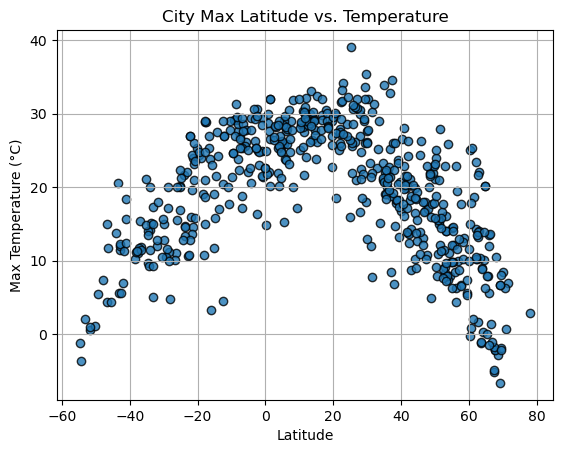

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

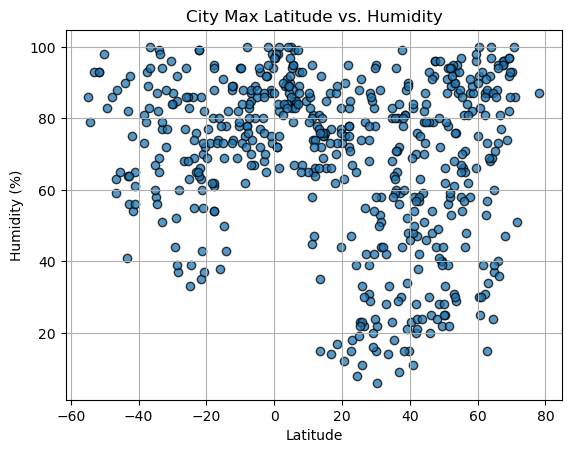

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

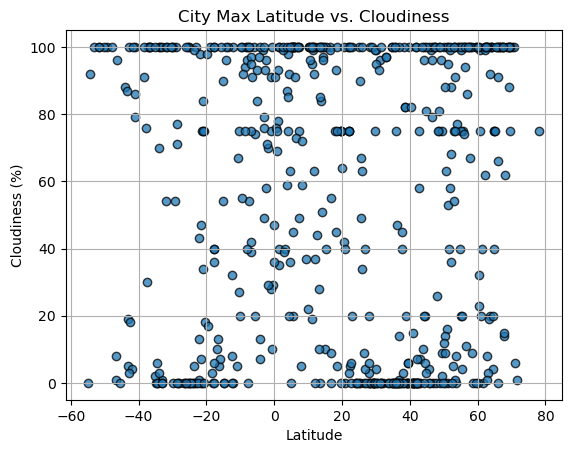

In [11]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

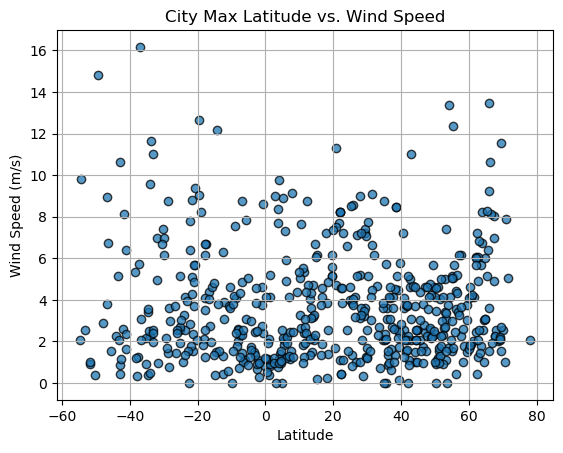

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# This took sooooo long to do. I had to go over the previous module to get an idea of how I would write the code for the regression line.
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r")

    # Annotate regression equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Print r-squared value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [14]:
# Filter data for Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ghadamis,30.1337,9.5007,27.69,15,4,1.25,LY,1717205353
3,yellowknife,62.4560,-114.3525,10.29,53,100,7.20,CA,1717205133
5,margate,51.3813,1.3862,12.15,78,100,4.02,GB,1717205354
6,severnoye,56.3491,78.3619,4.43,71,100,3.58,RU,1717205354
8,kodiak,57.7900,-152.4072,6.73,87,100,6.17,US,1717205327


In [15]:
# Filter data for Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,natal,-5.7950,-35.2094,26.12,89,20,3.09,BR,1717204741
1,port-aux-francais,-49.3500,70.2167,5.48,83,100,14.81,TF,1717205293
4,le port,-20.9373,55.2919,21.00,70,34,3.70,RE,1717205172
7,grytviken,-54.2811,-36.5092,-3.60,79,92,9.80,GS,1717205292
9,port elizabeth,-33.9180,25.5701,14.16,99,100,2.24,ZA,1717205299


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5793348523630117


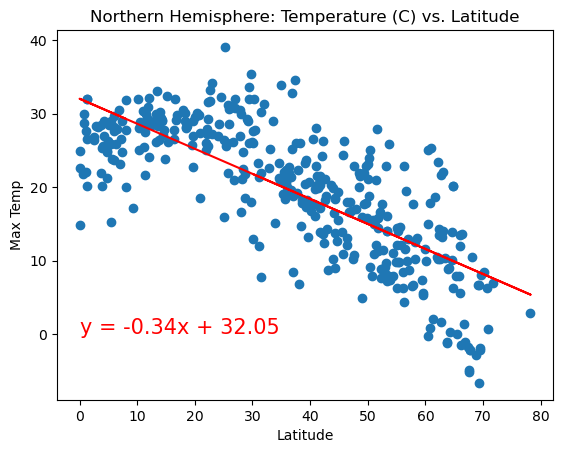

In [16]:
# Perform linear regression on Northern Hemisphere temperature vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
titles = "Northern Hemisphere: Temperature (C) vs. Latitude"
xlabel = "Latitude"
ylabel = "Max Temp"
text_coordinates = (0,0)
plot_linear_regression(x_values, y_values, titles, xlabel, ylabel, text_coordinates)

The r-value is: 0.6159924789393647


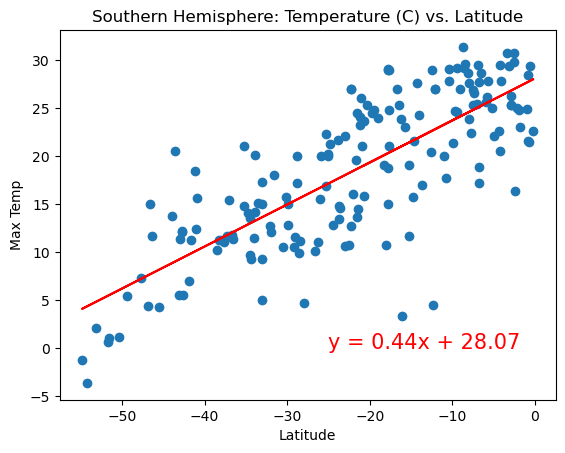

In [17]:
# Perform linear regression on Southern Hemisphere temperature vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Southern Hemisphere: Temperature (C) vs. Latitude"
xlabel = "Latitude"
ylabel = "Max Temp"
text_coordinates = (-25, 0)  # Adjust coordinates for annotation
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

**Discussion about the linear relationship:** There is a very clear linear relationship, escpecially given the r-values of 0.6 and 0.7, which are moderately strong positive and strong positive, respectively. They both are angled regression lines as well, showing an even stronger correlation between the Max Temp vs. Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006317897907652831


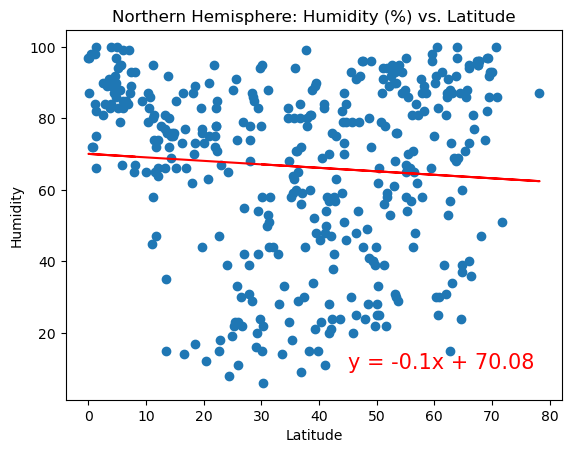

In [18]:
# Perform linear regression on Northern Hemisphere humidity vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Northern Hemisphere: Humidity (%) vs. Latitude"
xlabel = "Latitude"
ylabel = "Humidity"
text_coordinates = (45, 10)  # Adjust coordinates for annotation
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

The r-value is: 0.011800648644775145


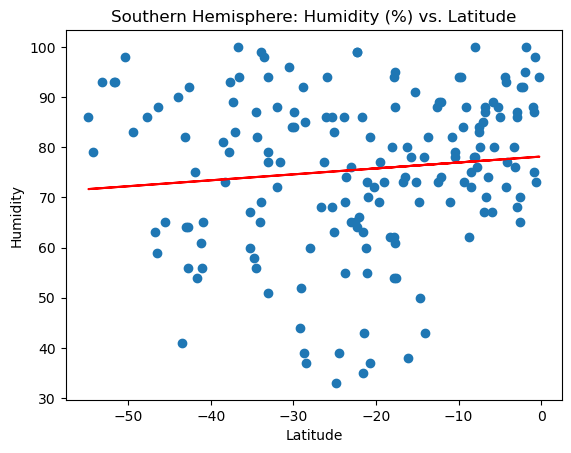

In [19]:
# Perform linear regression on Southern Hemisphere humidity vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Southern Hemisphere: Humidity (%) vs. Latitude"
xlabel = "Latitude"
ylabel = "Humidity"
text_coordinates = (-55, 20)  # Adjust coordinates for annotation
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

**Discussion about the linear relationship:** These 2 regression lines are odd. They aren't opposites, like the previous 2 regression lines, with the first one having a 1.1 r-value, which puts it ouside the Pearson correlation coefficient. The second regression lines 0.03 r-value ameks it a very weak positive linear relationship. Comparing not only the far too high and far too low r-values of their respective regressions, this is a clear indication that there is little to no correltaion between Humidity and Latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00048201750656418584


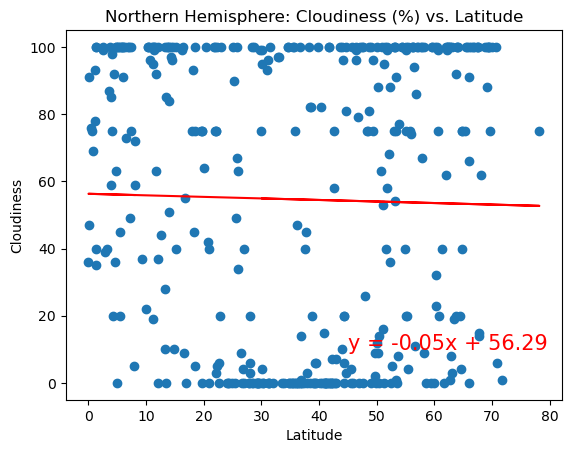

In [20]:
# Perform linear regression on Northern Hemisphere cloudiness vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Northern Hemisphere: Cloudiness (%) vs. Latitude"
xlabel = "Latitude"
ylabel = "Cloudiness"
text_coordinates = (45, 10)  # Adjust coordinates for annotation
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

The r-value is: 0.0011885686261193134


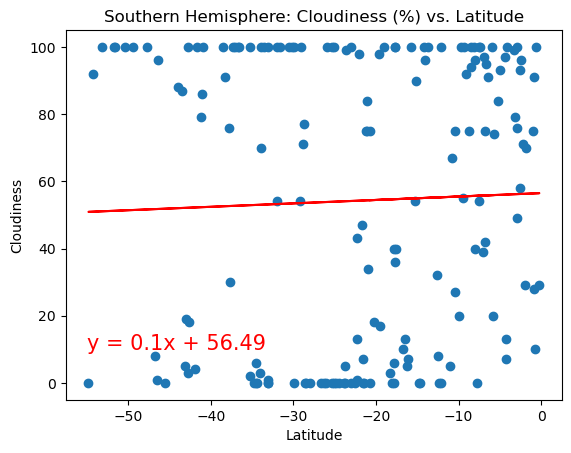

In [21]:
# Perform linear regression on Southern Hemisphere cloudiness vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Southern Hemisphere: Cloudiness (%) vs. Latitude"
xlabel = "Latitude"
ylabel = "Cloudiness"
text_coordinates = (-55, 10)  # Adjust coordinates for annotation
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

**Discussion about the linear relationship:** R-values of 0.014 and 0.0069, which both indicate a very weak positive linear relationship, along with scatter plots that share no similarities, is an immediate indicator that Cloudiness and Latitude share no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004703964452400562


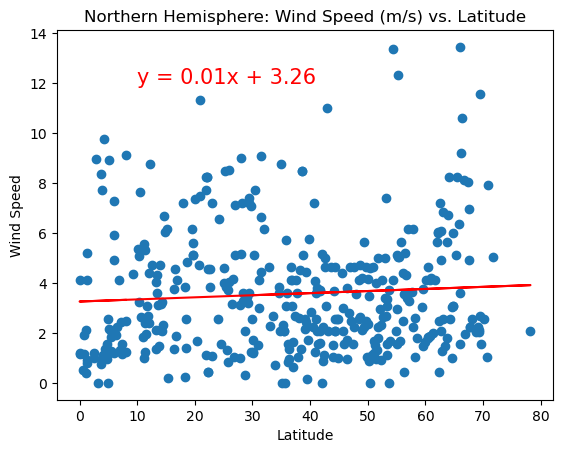

In [22]:
# Perform linear regression on Northern Hemisphere wind speed vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Northern Hemisphere: Wind Speed (m/s) vs. Latitude"
xlabel = "Latitude"
ylabel = "Wind Speed"
text_coordinates = (10, 12)  # Adjust coordinates for annotation
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

The r-value is: 0.024878041263702095


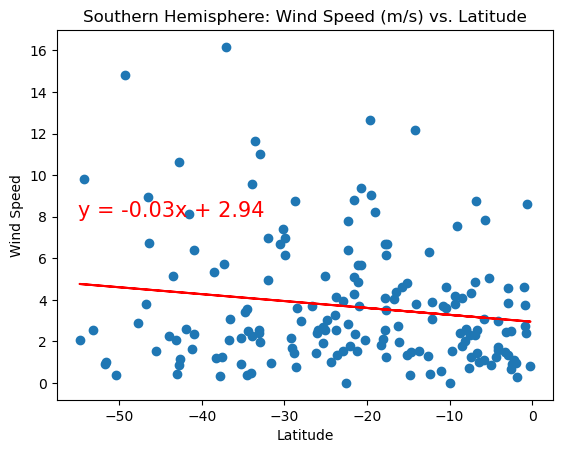

In [23]:
# Perform linear regression on Southern Hemisphere wind speed vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Southern Hemisphere: Wind Speed (m/s) vs. Latitude"
xlabel = "Latitude"
ylabel = "Wind Speed"
text_coordinates = (-55, 8)  # Adjust coordinates for annotation
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

**Discussion about the linear relationship:** R-values of 0.0058 and 0.018 are both very weak positive linear relationships, and the scatter plots, while less random , show that there is no correlation between Wind Speed and Latitude. It's important to note that in a few of these graphs, several of the points are grouped close to the regression line, but if the line itself has little no angle within the data (i.e. little to no regression), then it indicates that there is no correltation between the two variables, as is the case with these two graphs and the previous four.